In [2]:
!pip install gdown

In [3]:
!gdown 16gQQLm3ileVt0mS3ASHv7fr990lbOfIF

Downloading...
From (original): https://drive.google.com/uc?id=16gQQLm3ileVt0mS3ASHv7fr990lbOfIF
From (redirected): https://drive.google.com/uc?id=16gQQLm3ileVt0mS3ASHv7fr990lbOfIF&confirm=t&uuid=0ebd01bc-0062-42c0-87f7-c3e470467893
To: /content/devnagari digit.zip
100% 16.6M/16.6M [00:00<00:00, 38.7MB/s]


In [4]:
!unzip '/content/devnagari digit.zip'

Streaming output truncated to the last 5000 lines.
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10299.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10300.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10301.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10302.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10303.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10304.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10306.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10307.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104017.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104018.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104019.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104021.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104023.p

In [5]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image # Import Pillow

In [9]:
import os
print(os.listdir())


['.config', 'devnagari digit.zip', 'DevanagariHandwrittenDigitDataset', 'sample_data']


In [26]:
# Define dataset paths
train_dir = "DevanagariHandwrittenDigitDataset/Train/"  # Path to training data
test_dir = "DevanagariHandwrittenDigitDataset/Test/"  # Path to testing data


In [27]:
# Set image dimensions
img_height, img_width = 28, 28

# Function to load images and corresponding labels using PIL
def load_images_from_folder(folder):
    images, labels = [], []
    class_names = sorted(os.listdir(folder))  # Get sorted list of class directories (e.g., digit_0, digit_1, ...)
    class_map = {name: idx for idx, name in enumerate(class_names)}  # Assign numeric labels to class names

    for class_name in class_names:
        class_path = os.path.join(folder, class_name)
        label = class_map[class_name]

        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)

            # Open image with PIL, convert to grayscale, and resize to (28x28)
            img = Image.open(img_path).convert("L")
            img = img.resize((img_width, img_height))

            # Normalize pixel values to the range [0,1] and convert to a NumPy array
            img = np.array(img) / 255.0

            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)


In [28]:
# Load training and testing datasets
x_train, y_train = load_images_from_folder(train_dir)  # Training dataset
x_test, y_test = load_images_from_folder(test_dir)  # Testing dataset

In [29]:
# Reshape images for Keras input
x_train = x_train.reshape(-1, img_height, img_width, 1) # Shape (num_samples, 28, 28, 1)
x_test = x_test.reshape(-1, img_height, img_width, 1)

In [30]:
# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [31]:
# Print dataset shape
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")

Training set: (17000, 28, 28, 1), Labels: (17000, 10)
Testing set: (3000, 28, 28, 1), Labels: (3000, 10)


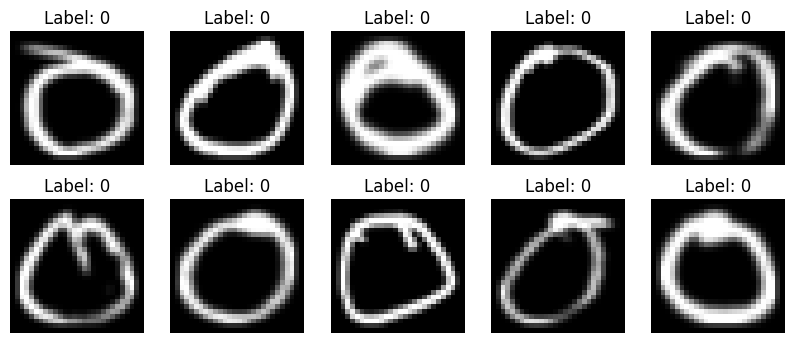

In [32]:
# Visualize some images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap="gray")
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis("off")

plt.show()

In [33]:
x_train = x_train.reshape(-1, img_height, img_width, 1)

In [19]:
# Model parameters
import tensorflow as tf
from tensorflow import keras
num_classes = 10
input_shape = (28, 28, 1)
model = keras.Sequential(
[
  keras.layers.Input(shape=input_shape),
  keras.layers.Flatten(), # Flatten the 28x28 image to a 784-dimensional vector
  keras.layers.Dense(64, activation="sigmoid"),
  keras.layers.Dense(128, activation="sigmoid"),
  keras.layers.Dense(256, activation="sigmoid"),
  keras.layers.Dense(num_classes, activation="softmax"),
]
)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(
optimizer="sgd", # Stochastic Gradient Descent
loss="categorical_crossentropy", # Loss function for multi-class classification
metrics=["accuracy"] # Track accuracy during training
)

In [22]:
batch_size = 128
epochs = 20
# Callbacks
callbacks = [
  keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
  keras.callbacks.EarlyStopping(monitor="val_loss", patience=4 ),
]
# Train the model with callbacks and validation split
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2,
    callbacks=callbacks,
)

Epoch 1/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1262 - loss: 2.1782 - val_accuracy: 0.0000e+00 - val_loss: 4.7393
Epoch 2/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1299 - loss: 2.0957 - val_accuracy: 0.0000e+00 - val_loss: 5.3512
Epoch 3/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1265 - loss: 2.0888 - val_accuracy: 0.0000e+00 - val_loss: 5.7308
Epoch 4/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1341 - loss: 2.0856 - val_accuracy: 0.0000e+00 - val_loss: 6.0050
Epoch 5/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1379 - loss: 2.0834 - val_accuracy: 0.0000e+00 - val_loss: 6.2194


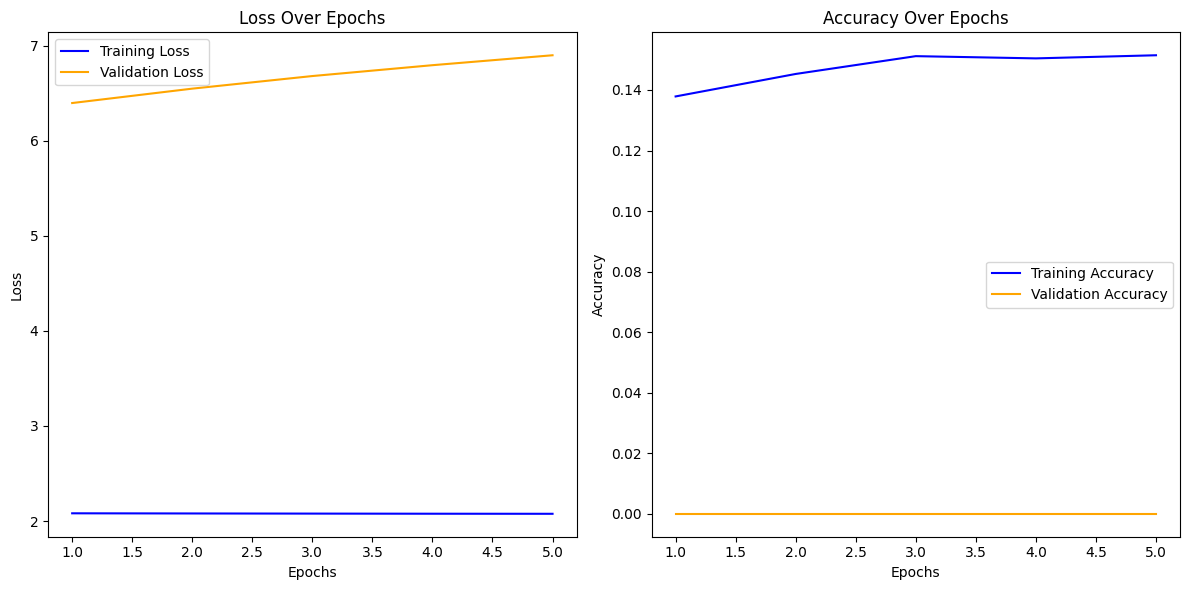

In [34]:
import matplotlib.pyplot as plt

# Assuming 'history' is the result from model.fit()
# Retrieve training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Retrieve training and validation accuracy (if specified)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Create a figure for loss and accuracy plots
plt.figure(figsize=(12, 6))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy', color='blue')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

# Adjust layout and display plots
plt.tight_layout()
plt.show()


In [35]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

94/94 - 0s - 2ms/step - accuracy: 0.1000 - loss: 3.0396
Test accuracy: 0.1000
